### 라이브러리 임포트

In [39]:
import easyocr  # OCR 라이브러리
import cv2      # OpenCV 라이브러리

from PIL import ImageFont, ImageDraw, Image     # 사진 위에 그림을 그릴(네모박스) 라이브러리
import matplotlib.pyplot as plt     # 사진을 표시할 plt
import numpy as np                  # numpy 배열
import pandas as pd                 # DataFrame을 위한 pandas

### 그림(png, jpge)파일 불러오기 및 OCR 실행

In [41]:
# 불러올 파일 경로
# path = r'C:\ITStudy\100_SelfProject\2nd_TechSeminar\Data\menu.png'
path = r'C:\ITStudy\100_SelfProject\2nd_TechSeminar\Data\panel.jpg'

# 이미지 불러오기 - 371 x 1001 x 3 차원 (세로, 가로, 색상채널(BGR))
image_cv = cv2.imread(path)

# OCR 엔진 실행
reader = easyocr.Reader(['ko', 'en'])   # OCR을 실행할 Reader 객체
result =  reader.readtext(path)         # 이미지로 부터 텍스트를 읽어옮

# result: [바운딩 박스 좌표, 인식된 텍스트, 신뢰도] 

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
c:\ITStudy\100_SelfProject\2nd_TechSeminar\.venv\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


![](https://github.com/JaidedAI/EasyOCR/raw/master/examples/easyocr_framework.jpeg)

In [42]:
result

[([[np.int32(292), np.int32(80)],
   [np.int32(358), np.int32(80)],
   [np.int32(358), np.int32(108)],
   [np.int32(292), np.int32(108)]],
  'TiemaPary',
  np.float64(0.4241354589697089)),
 ([[np.int32(154), np.int32(172)],
   [np.int32(192), np.int32(172)],
   [np.int32(192), np.int32(196)],
   [np.int32(154), np.int32(196)]],
  'way',
  np.float64(0.999797931022176)),
 ([[np.int32(372), np.int32(166)],
   [np.int32(408), np.int32(166)],
   [np.int32(408), np.int32(192)],
   [np.int32(372), np.int32(192)]],
  'Stni',
  np.float64(0.6063504815101624)),
 ([[np.int32(94), np.int32(202)],
   [np.int32(142), np.int32(202)],
   [np.int32(142), np.int32(234)],
   [np.int32(94), np.int32(234)]],
  '시 청',
  np.float64(0.5029411465255441)),
 ([[np.int32(202), np.int32(212)],
   [np.int32(272), np.int32(212)],
   [np.int32(272), np.int32(244)],
   [np.int32(202), np.int32(244)]],
  '200m',
  np.float64(0.9150068759918213)),
 ([[np.int32(90), np.int32(228)],
   [np.int32(164), np.int32(228)],
   

### 생성된 결과를 텍스트로 저장

In [43]:
word_list = [[text, round(confidence, 3)] for bbox, text, confidence in result]

df = pd.DataFrame(word_list, columns=['Text', 'Confidence'])
print(df)

         Text  Confidence
0   TiemaPary       0.424
1         way       1.000
2        Stni       0.606
3         시 청       0.503
4        200m       0.915
5     CilyHal       0.513
6       '광한루웬       0.176
7        Cmam       0.615
8      [형되마파크       0.302
9        법원검찰       0.991
10        남원역       0.994
11       고속도로       1.000
12     Namwon       1.000
13   Expresst       0.952
14       '시의회       0.605


### 생성된 결과를 이미지로 저장

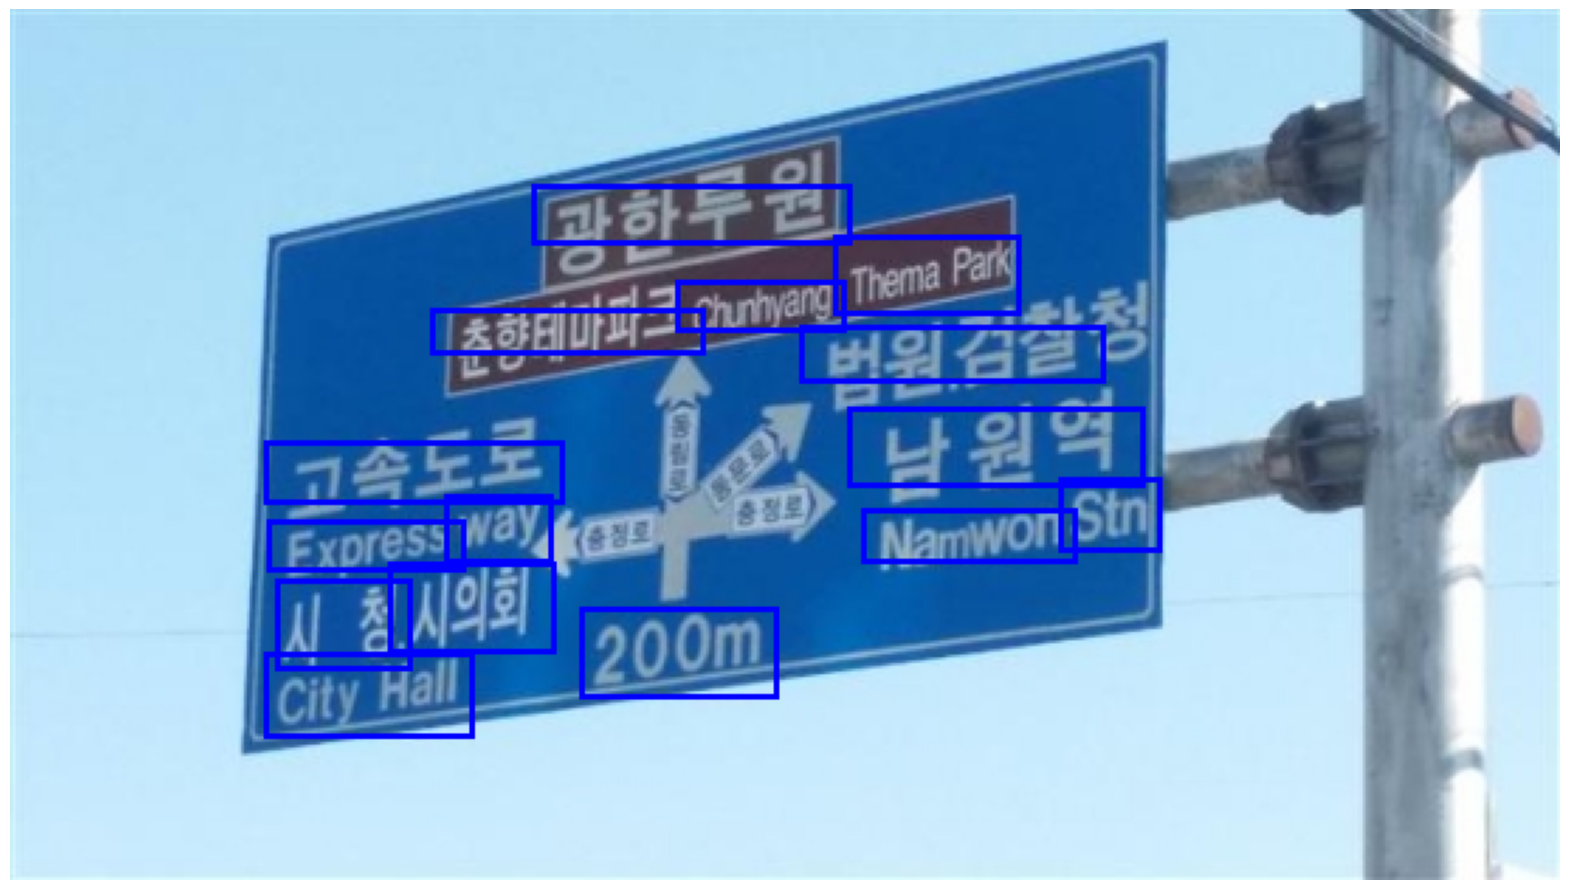

In [44]:
# 3. 색상 채널 변환 (BGR -> RGB): cv2(BGR)로 읽은 이미지를 Pillow(RGB) 형식에 맞게 변환합니다.
image_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)
image = Image.fromarray(image_rgb)

# 폰트 설정 (한글 지원 폰트)
# Windows: "malgun.ttf", macOS: "AppleGothic.ttf"
try:
    font = ImageFont.truetype("malgun.ttf", 15)
except IOError:
    font = ImageFont.load_default() # 폰트 파일이 없을 경우 기본 폰트 사용

draw = ImageDraw.Draw(image)

# 인식된 텍스트와 바운딩 박스를 이미지에 그리기
for (bbox, text, prob) in result:
    # bbox는 [[x1,y1], [x2,y2], [x3,y3], [x4,y4]] 형태의 리스트입니다.
    # top_left, bottom_right 좌표를 직접 사용하는 것이 더 명확합니다.
    top_left = tuple(map(int, bbox[0]))
    bottom_right = tuple(map(int, bbox[2]))

    # 바운딩 박스 그리기
    draw.rectangle((top_left, bottom_right), outline="blue", width=2)

    # # 텍스트 그리기 (박스 위에 위치)
    # text_position = (top_left[0], top_left[1] - 20)
    # draw.text(text_position, text, font=font, fill="black")

# 결과 이미지 출력
plt.figure(figsize=(20,12))
plt.imshow(image)
plt.axis('off')  # 축 눈금 숨기기
plt.show()

### 출처

EasyOCR GitHub: https://github.com/JaidedAI/EasyOCR?tab=readme-ov-file

코드 참조: https://velog.io/@joongwon00/%EC%9D%B8%ED%84%B4-%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8-2.-EasyOCR%EC%9D%84-%EC%8D%A8%EB%B3%B4%EC%9E%90

이미지 전처리 기법: https://yonghyn.tistory.com/88


